In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from numpy import moveaxis
from numpy import array
import pandas as pd
import keras.applications.resnet_v2 as kikiki
a=kikiki.ResNet50V2(include_top=False, weights=None, input_tensor=None, input_shape=(299,299,3), pooling=None,classes=10000)
from keras.preprocessing import image
from keras.applications.resnet_v2 import preprocess_input

Using TensorFlow backend.


In [ ]:
def extractThree(x):
  mid = len(x) // 2

  return np.array([ x[mid-1] , x[mid] ,x[mid+1]])


In [ ]:
def getTrainingData(type1,type2):

  list = []

  for filename in sorted(os.listdir("/content/drive/My Drive/MINOR PROJECT/Knee MRI Dataset/MRNet-v1.0/"+type1+"/"+type2)):
    if(filename != ".DS_Store"):
      trainingExample = np.load("/content/drive/My Drive/MINOR PROJECT/Knee MRI Dataset/MRNet-v1.0/"+type1+"/"+type2+"/" + filename)
      x = image.img_to_array(trainingExample)
      x = np.expand_dims(x, axis=0)
      x = preprocess_input(x)

      list.append(extractThree(trainingExample))

  return list.copy()


sagittalTrainingData = getTrainingData("train","sagittal")
axialTrainingData = getTrainingData("train","axial")
coronalTrainingData = getTrainingData("train","coronal")

sagittalTestData = getTrainingData("valid","sagittal")
axialTestData = getTrainingData("valid","axial")
coronalTestData = getTrainingData("valid","coronal")


In [ ]:
def reshape_data(trainingData):
  data = asarray(trainingData)
  data = moveaxis(data, 1, 3)
  print(data.shape)

  return data



In [ ]:
sagittalData  = reshape_data(sagittalTrainingData)
axialData = reshape_data(axialTrainingData)
coronalData = reshape_data(coronalTrainingData)

sagittalTestData = reshape_data(sagittalTestData)
axialTestData = reshape_data(axialTestData)
coronalTestData = reshape_data(coronalTestData)


(1130, 256, 256, 3)
(1130, 256, 256, 3)
(1130, 256, 256, 3)
(120, 256, 256, 3)
(120, 256, 256, 3)
(120, 256, 256, 3)


In [ ]:
def readLabels(type1,type2):
  path = "/content/drive/My Drive/Knee MRI Dataset/MRNet-v1.0/"+type1+"-"+type2 + ".csv"
  df=pd.read_csv(path, sep=',',header=None)
  labelsValid = df.values
  labelsValid = labelsValid[:,1]
  return labelsValid


In [ ]:
abnormalLabels = readLabels('train','abnormal')
aclLabels = readLabels('train','acl')
meniscusLabels = readLabels('train','meniscus')


abnornmalTestLabels = readLabels('valid','abnormal')
aclTestLabels = readLabels('valid','acl')
meniscusTestLabels = readLabels('valid','meniscus')

In [ ]:
from keras import models
from keras import layers
from keras.models import Model
from keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from keras.applications import VGG19

def buildModel():
  vgg = VGG19(include_top=False, weights='imagenet', input_tensor=None, input_shape=(256,256,3), pooling=None)

  for layer in vgg.layers:
    layer.trainable = False

  x = vgg.output
  x = layers.GlobalAveragePooling2D()(x)
  x = layers.Dropout(0.6)(x)
  predictions = layers.Dense(1, activation= 'sigmoid')(x)
  model = Model(inputs = vgg.input, outputs = predictions)

  model.summary()

  model.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])
  return model



In [ ]:
model_abnormal_sagittal = buildModel()
history_abnormal_sagittal = model_abnormal_sagittal.fit(sagittalData,abnormalLabels,epochs=60,validation_split=0.1, verbose=1,shuffle=True, callbacks = [EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')])

model_abnormal_axial = buildModel()
history_abnormal_axial = model_abnormal_axial.fit(axialData,abnormalLabels,epochs=60,validation_split=0.1, verbose=1,shuffle=True, callbacks = [EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')])

model_abnormal_coronal = buildModel()
history_abnormal_coronal = model_abnormal_coronal.fit(coronalData,abnormalLabels,epochs=60,validation_split=0.1, verbose=1,shuffle=True, callbacks = [EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')])






80142336/80134624 [==============================] - 1s 0us/step







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________


In [ ]:
model_acl_sagittal = buildModel()
history_acl_sagittal = model_acl_sagittal.fit(sagittalData,aclLabels,epochs=60,validation_split=0.1, verbose=1,shuffle=True, callbacks = [EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')])

model_acl_axial = buildModel()
history_acl_axial = model_acl_axial.fit(axialData,aclLabels,epochs=60,validation_split=0.1, verbose=1,shuffle=True, callbacks = [EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')])

model_acl_coronal = buildModel()
history_acl_coronal = model_acl_coronal.fit(coronalData,aclLabels,epochs=60,validation_split=0.1, verbose=1,shuffle=True, callbacks = [EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')])


Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0   

In [ ]:
model_meniscus_sagittal = buildModel()
history_meniscus_sagittal = model_meniscus_sagittal.fit(sagittalData,meniscusLabels,epochs=30,validation_split=0.1, verbose=1,shuffle=True, callbacks = [EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')])

model_meniscus_axial = buildModel()
history_meniscus_axial = model_meniscus_axial.fit(axialData,meniscusLabels,epochs=30,validation_split=0.1, verbose=1,shuffle=True, callbacks = [EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')])

model_meniscus_coronal = buildModel()
history_meniscus_coronal = model_meniscus_coronal.fit(coronalData,meniscusLabels,epochs=30,validation_split=0.1, verbose=1,shuffle=True, callbacks = [EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')])


Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0   

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


def getEvaluationScore(labels,predictions):

  my_score = accuracy_score(labels, predictions)
  print("my score: ",my_score)


  fscore = f1_score(labels, predictions)

  print("fscore: ",fscore)

  return my_score


In [ ]:
def predictLabels(data,model,threshold):
  labels = model.predict(data)
  for i in labels:
    print(i)

  labels = list(map(lambda x: 0 if x<threshold else 1, labels))
  print(labels)
  return labels

In [ ]:
predictions_abnormal_sagittal = predictLabels(sagittalTestData,model_abnormal_sagittal, 0.75)
print("---------------------------------------------------------------------------------")
predictions_abnormal_axial = predictLabels(axialTestData,model_abnormal_axial, 0.75)
print("---------------------------------------------------------------------------------")
predictions_abnormal_coronal = predictLabels(coronalTestData,model_abnormal_coronal, 0.75)

print("############################################")
predictions_acl_sagittal = predictLabels(sagittalTestData,model_acl_sagittal, 0.15)
print("---------------------------------------------------------------------------------")
predictions_acl_axial = predictLabels(axialTestData,model_acl_axial, 0.15)
print("---------------------------------------------------------------------------------")
predictions_acl_coronal = predictLabels(coronalTestData,model_acl_coronal, 0.15)

print("############################################")
predictions_meniscus_sagittal = predictLabels(sagittalTestData,model_meniscus_sagittal, 0.4)
print("---------------------------------------------------------------------------------")
predictions_meniscus_axial = predictLabels(axialTestData,model_meniscus_axial, 0.4)
print("---------------------------------------------------------------------------------")
predictions_meniscus_coronal = predictLabels(coronalTestData,model_meniscus_coronal, 0.4)

[0.77563095]
[0.9512249]
[0.567369]
[0.48231336]
[0.90634567]
[0.96429855]
[0.89984465]
[0.98336875]
[0.9154383]
[0.8768708]
[0.97529507]
[0.9636979]
[0.98425657]
[0.7290429]
[0.84376717]
[0.9711054]
[0.72938854]
[0.59171975]
[0.8827538]
[0.6059257]
[0.914753]
[0.9683436]
[0.77779806]
[0.5605508]
[0.97081876]
[0.92164207]
[0.99797946]
[0.9535531]
[0.92425597]
[0.8410189]
[0.9957012]
[0.9459032]
[0.9908018]
[0.9872066]
[0.8499789]
[0.8969451]
[0.973644]
[0.9791392]
[0.87493813]
[0.9099935]
[0.9668732]
[0.97154605]
[0.9854392]
[0.99493605]
[0.8824193]
[0.99875796]
[0.97315633]
[0.95709944]
[0.9982835]
[0.9907688]
[0.9936944]
[0.9351275]
[0.9715296]
[0.99745154]
[0.99248856]
[0.9423245]
[0.9908198]
[0.99891436]
[0.9849254]
[0.9773675]
[0.9987501]
[0.98856014]
[0.9796603]
[0.99291486]
[0.99449944]
[0.9875107]
[0.9985819]
[0.94766533]
[0.94417024]
[0.99677885]
[0.9277847]
[0.9883393]
[0.9699124]
[0.9822023]
[0.9946365]
[0.9730755]
[0.99538064]
[0.95161784]
[0.9715063]
[0.96566045]
[0.974653

In [ ]:
def ensemble(predictions1,predictions2,predictions3):
  list=[]
  for i in range(0,len(predictions1),1):
    total = sum([predictions1[i],predictions2[i],predictions3[i]])
    if total > 1:
      list.append(1)
    else:
      list.append(0)

  return list.copy()

labels_abnormal_ensemble = ensemble(predictions_abnormal_sagittal,predictions_abnormal_axial,predictions_abnormal_coronal)
print("labels_abnormal_ensemble: ",labels_abnormal_ensemble)
score_abnormal = getEvaluationScore(abnornmalTestLabels, labels_abnormal_ensemble)


labels_acl_ensemble = ensemble(predictions_acl_sagittal,predictions_acl_axial,predictions_acl_coronal)
print("labels_acl_ensemble: ",labels_acl_ensemble)
score_acl = getEvaluationScore(aclTestLabels, labels_acl_ensemble)



labels_meniscus_ensemble = ensemble(predictions_meniscus_sagittal,predictions_meniscus_axial,predictions_meniscus_coronal)
print("labels_meniscus_ensemble: ",labels_meniscus_ensemble)
score_meniscus = getEvaluationScore(meniscusTestLabels, labels_meniscus_ensemble)




labels_abnormal_ensemble:  [1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
my score:  0.8416666666666667
fscore:  0.9082125603864734
labels_acl_ensemble:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]
my score:  0.8
fscore:  0.7692307692307692
labels_meniscus_ensemble:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1

In [ ]:
# score1 = getEvaluationScore(abnornmalTestLabels, predictions_abnormal_sagittal)
# score2 = getEvaluationScore(abnornmalTestLabels, predictions_abnormal_axial)
# score3 = getEvaluationScore(abnornmalTestLabels, predictions_abnormal_coronal)


In [ ]:
def plot_accuracy(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', label='Training acc')
  plt.plot(epochs, val_acc, 'r', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.grid(True)

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.grid(True)
  plt.show()

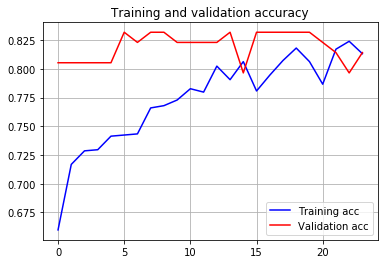

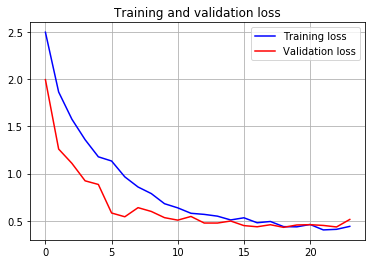

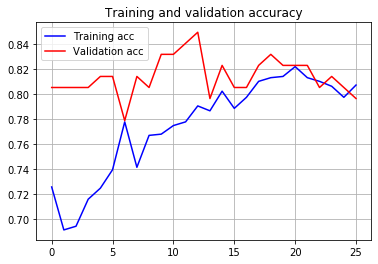

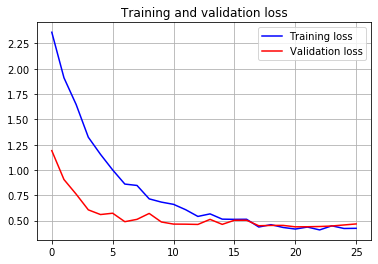

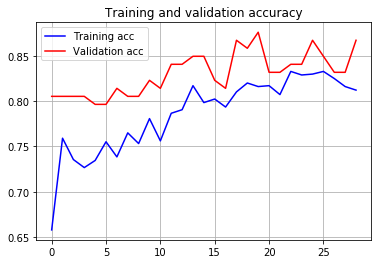

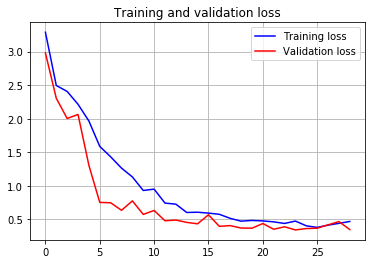

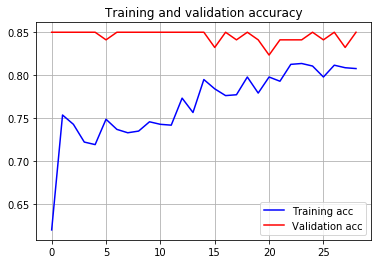

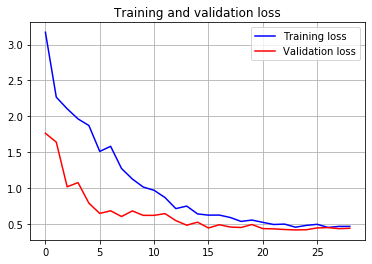

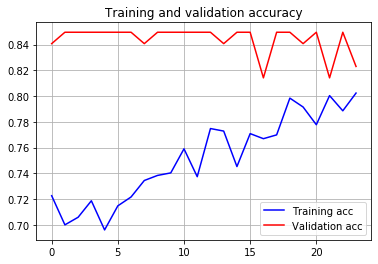

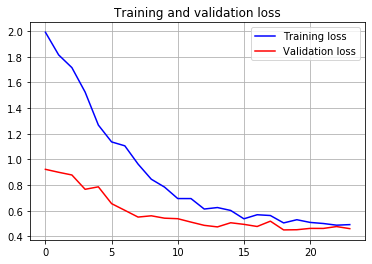

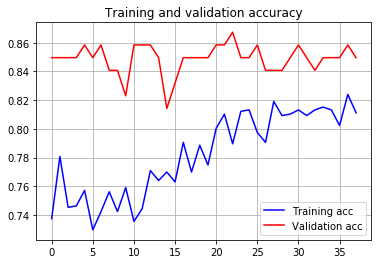

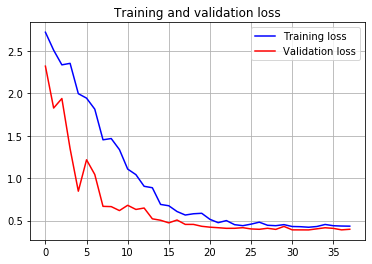

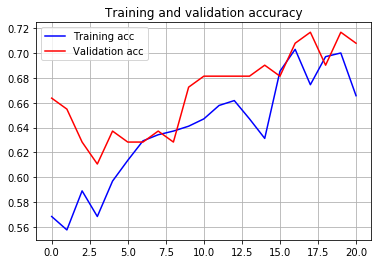

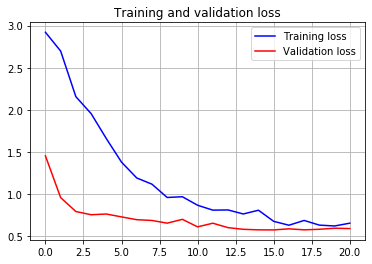

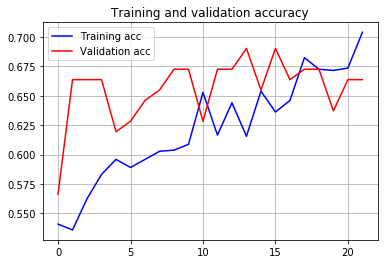

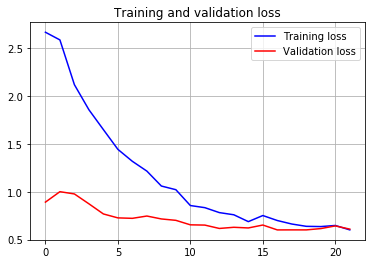

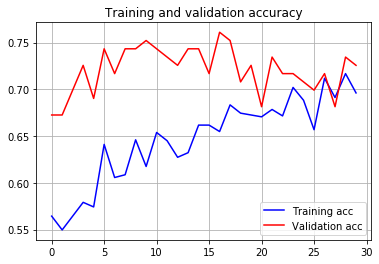

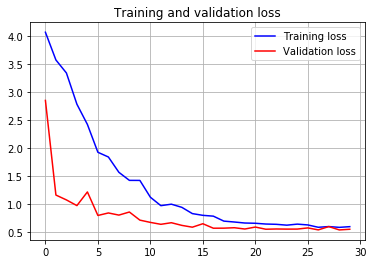

In [ ]:

plot_accuracy(history_abnormal_sagittal)
plot_accuracy(history_abnormal_coronal)
plot_accuracy(history_abnormal_axial)

plot_accuracy(history_acl_sagittal)
plot_accuracy(history_acl_coronal)
plot_accuracy(history_acl_axial)

plot_accuracy(history_meniscus_sagittal)
plot_accuracy(history_meniscus_coronal)
plot_accuracy(history_meniscus_axial)
